READING FITS IMAGES

In [1]:
from astropy.io import fits

hdulist = fits.open(r'D:\casa\casa_0.5-1.5keV.fits')

data = hdulist[0].data
hdulist.close()

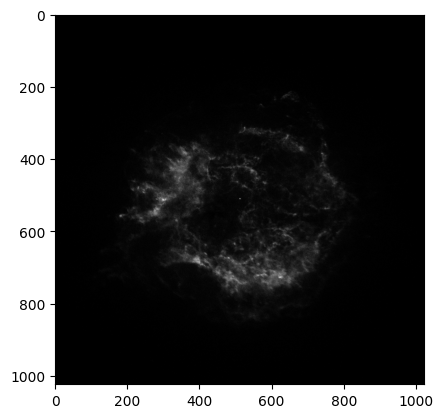

In [2]:
import matplotlib.pyplot as plt
plt.imshow(data, cmap='gray')
plt.show()
header = hdulist[0].header

In [3]:
print(header)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                 1024 / Axis Length                                    NAXIS2  =                 1024 / Axis Length                                    OBJECT  = 'Cassiopeia A'                                                        DATE-OBS= '2007-12-05T22:01:59'                                                 DATE-END= '2007-12-08T20:07:24'                                                 LTM1_1  =                    1                                                  LTM1_2  =                    0                                                  LTM2_1  =                    0                                                  LTM2_2  =                    1                                                  LTV1    =                -3651          

APPLYING EQUALIZER

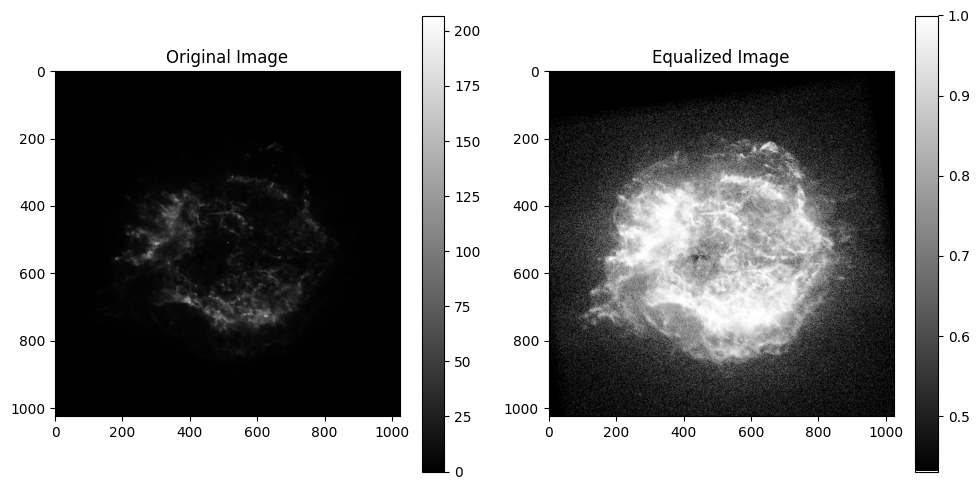

In [4]:
from astropy.io import fits
import matplotlib.pyplot as plt
from skimage import exposure

hdulist = fits.open(r'D:\casa\casa_0.5-1.5keV.fits')
data = hdulist[0].data
header = hdulist[0].header
hdulist.close()
data_equalized = exposure.equalize_hist(data)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(data_equalized, cmap='gray')
plt.title('Equalized Image')
plt.colorbar()

plt.tight_layout()
plt.show()

COMPOSITE

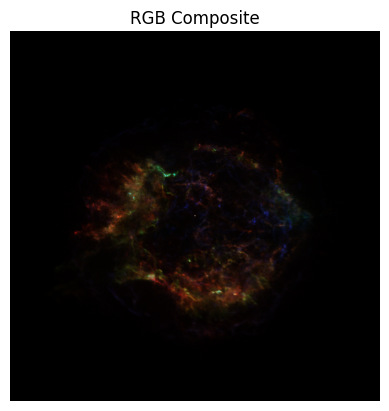

In [5]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

hdulist_red = fits.open(r'D:\casa\casa_0.5-1.5keV.fits')
hdulist_green = fits.open(r'D:\casa\casa_1.5-3.0keV.fits')
hdulist_blue = fits.open(r'D:\casa\casa_4.0-6.0keV.fits')

data_red = hdulist_red[0].data
data_green = hdulist_green[0].data
data_blue = hdulist_blue[0].data

hdulist_red.close()
hdulist_green.close()
hdulist_blue.close()
data_red_normalized = (data_red - data_red.min()) / (data_red.max() - data_red.min())
data_green_normalized = (data_green - data_green.min()) / (data_green.max() - data_green.min())
data_blue_normalized = (data_blue - data_blue.min()) / (data_blue.max() - data_blue.min())

rgb_image = np.dstack((data_red_normalized, data_green_normalized, data_blue_normalized))

plt.imshow(rgb_image)
plt.title('RGB Composite')
plt.axis('off')
plt.show()

HISTOGRAM

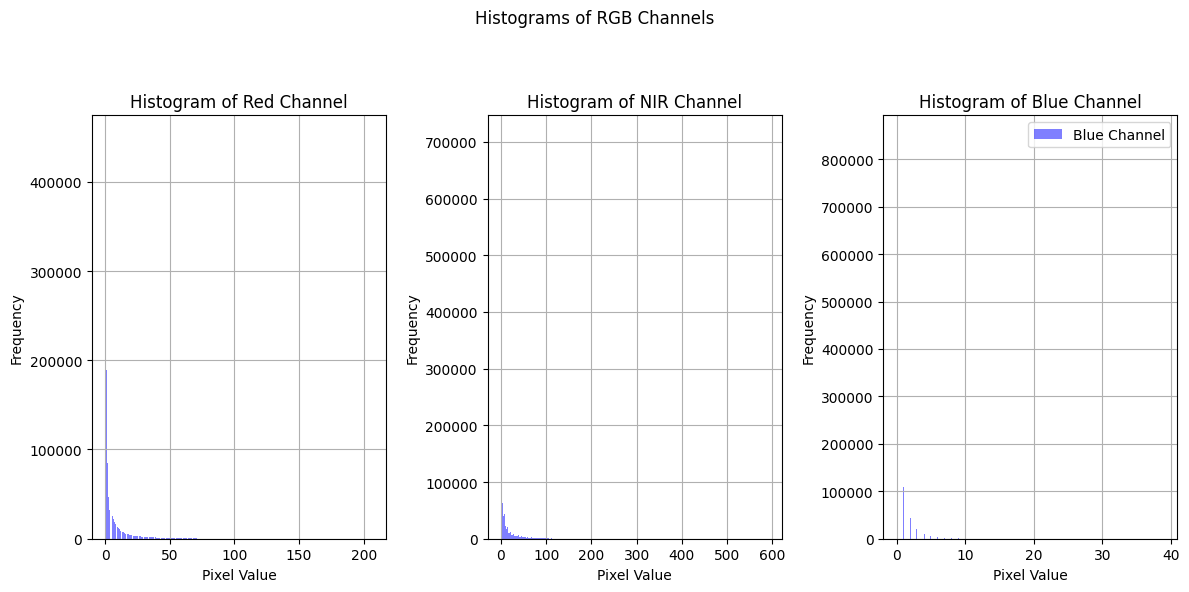

In [6]:
from astropy.io import fits
import matplotlib.pyplot as plt

def plot_histogram(data, label, title):
    plt.hist(data.ravel(), bins=256, color='blue', alpha=0.5, label=label)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(title)  # Add a title to the histogram
    plt.grid(True)

hdulist_red = fits.open(r'D:\casa\casa_0.5-1.5keV.fits')
hdulist_nir = fits.open(r'D:\casa\casa_1.5-3.0keV.fits')
hdulist_blue = fits.open(r'D:\casa\casa_4.0-6.0keV.fits')

data_red = hdulist_red[0].data
data_nir = hdulist_nir[0].data
data_blue = hdulist_blue[0].data

plt.figure(figsize=(12, 6))
plt.subplot(131)
plot_histogram(data_red, 'Red Channel', 'Histogram of Red Channel')
plt.subplot(132)
plot_histogram(data_nir,  'NIR Channel', 'Histogram of NIR Channel')
plt.subplot(133)
plot_histogram(data_blue, 'Blue Channel', 'Histogram of Blue Channel')

plt.suptitle('Histograms of RGB Channels', fontsize=12)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

STATISTICAL DATA

In [7]:
from astropy.io import fits

def compute_statistics(data, channel_name):
    mean_value = np.mean(data)
    median_value = np.median(data)
    
    mode_data = np.round(data).astype(int)
    mode_data = mode_data[mode_data >= 0] 
    if mode_data.size > 0:
        mode_value = float(np.argmax(np.bincount(mode_data.ravel())))
    else:
        mode_value = None
    
    std_deviation = np.std(data) 
    
    print(f"Statistics for {channel_name} Channel:")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Mode: {mode_value}\n")
    print(f"Standard Deviation: {std_deviation:.2f}\n")

hdulist_red = fits.open(r'D:\casa\casa_0.5-1.5keV.fits')
hdulist_green = fits.open(r'D:\casa\casa_1.5-3.0keV.fits')
hdulist_blue = fits.open(r'D:\casa\casa_4.0-6.0keV.fits')

data_red = hdulist_red[0].data
data_nir = hdulist_green[0].data
data_blue = hdulist_blue[0].data

hdulist_red.close()
hdulist_green.close()
hdulist_blue.close()

compute_statistics(data_red, 'Red')
compute_statistics(data_nir, 'NIR')
compute_statistics(data_blue, 'Blue')

Statistics for Red Channel:
Mean: 4.87
Median: 1.00
Mode: 0.0

Standard Deviation: 11.03

Statistics for NIR Channel:
Mean: 7.51
Median: 1.00
Mode: 0.0

Standard Deviation: 19.53

Statistics for Blue Channel:
Mean: 0.38
Median: 0.00
Mode: 0.0

Standard Deviation: 1.07

